In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
data_dir = Path('./experiments')

sns.set_style('whitegrid')
# sns.set_context('paper')
sns.set_theme('notebook', style='whitegrid', palette='Set2', font_scale=1)

# modify these variables according to your experiments:
experiment = data_dir / 'CLEAVE-eu-north-1'
experiment_duration_seconds = 30
tick_rate = 100

In [30]:
# load the net data
net_data = pd.read_csv(next(experiment.glob('udpclient.plant.*.csv')))
net_data

,seq,send_timestamp,send_size,recv_timestamp,recv_size,rtt
0,0.0,1.644249e+09,122.0,1.644249e+09,72.0,0.198445
1,1.0,1.644249e+09,122.0,1.644249e+09,72.0,0.183796
2,2.0,1.644249e+09,122.0,1.644249e+09,72.0,0.170112
3,3.0,1.644249e+09,122.0,1.644249e+09,72.0,0.164011
4,7.0,1.644249e+09,122.0,1.644249e+09,72.0,0.126753
...,...,...,...,...,...,...
2903,1427.0,1.644249e+09,124.0,NaN,NaN,inf
2904,1446.0,1.644249e+09,124.0,NaN,NaN,inf
2905,1678.0,1.644249e+09,124.0,NaN,NaN,inf
2906,1846.0,1.644249e+09,124.0,NaN,NaN,inf


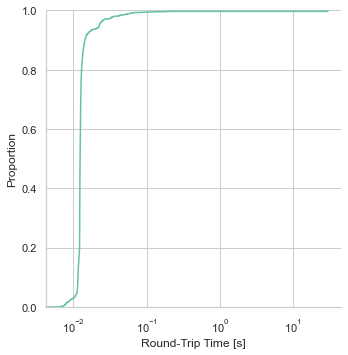

In [31]:
# plot the rtt distribution

# first, we need to fix the rtts a bit
# dropped packets are marked as having RTT = inf
# this doesn't work when plotting distributions,
# so we are going to use a little trick and mark
# infinites as equal to the total duration of the
# experiment, in seconds

net_data_fixed = net_data.copy()
net_data_fixed['rtt'] = net_data['rtt'].replace(np.inf, experiment_duration_seconds)

fg = sns.displot(
    kind='ecdf',
    data=net_data_fixed,
    x = 'rtt',
)
fg.set_xlabels('Round-Trip Time [s]')
fg.set(xscale='log')

plt.show()

In [32]:
# next, analyze stability of the system
# load plant physical data

plant_data = pd.read_csv(next(experiment.glob('simulation.plant.*.csv')))

# <emulation_rate> samples equals a second
plant_data['time'] = plant_data['tick']/tick_rate

plant_data

,tick,tick_dt,input_force,output_angle,output_ang_vel,output_speed,output_position,time
0,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.01
1,2.0,0.018498,0.000000,0.000000e+00,1.484967e-05,-1.154653e-07,0.000000e+00,0.02
2,3.0,0.018070,0.000000,2.683299e-07,1.072459e-07,1.307879e-08,-2.086430e-09,0.03
3,4.0,0.009606,0.000000,2.693601e-07,2.192324e-06,8.908342e-07,-1.960790e-09,0.04
4,5.0,0.009475,0.000000,2.901320e-07,-5.610407e-06,8.780580e-07,6.479716e-09,0.05
...,...,...,...,...,...,...,...,...
2903,2904.0,0.009015,0.059497,3.286199e-04,1.760711e-03,3.712149e-03,2.678506e-04,29.04
2904,2905.0,0.010653,0.059635,3.473770e-04,1.529994e-03,3.536347e-03,3.073967e-04,29.05
2905,2906.0,0.008922,0.059947,3.610283e-04,1.352911e-03,3.395217e-03,3.389496e-04,29.06
2906,2907.0,0.010846,0.060307,3.757013e-04,1.147051e-03,3.231880e-03,3.757725e-04,29.07


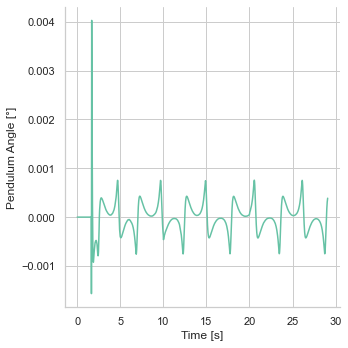

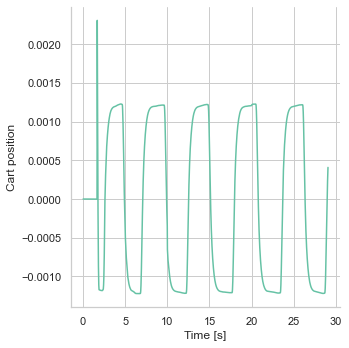

In [36]:
# first, let's visualize plant angle and position over time
fg = sns.relplot(
    kind='line',
    data=plant_data,
    x='time',
    y='output_angle'
)
fg.set_xlabels('Time [s]')
fg.set_ylabels('Pendulum Angle [°]')
plt.show()

fg = sns.relplot(
    kind='line',
    data=plant_data,
    x='time',
    y='output_position'
)
fg.set_xlabels('Time [s]')
fg.set_ylabels('Cart position')
plt.show()